<a href="https://colab.research.google.com/github/Harshi07-c/HEALTH-STATUS-PREDICTION-EX-AI_/blob/main/DataPreprocessing_EDA_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING REQUIRED LIBRARIES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/dataset2.csv")
display(df.head())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
2,Excellent,Within the past 2 years,Yes,No,No,No,No,No,No,Female,70-74,152,52.16,22.46,No,0,30,4,0
3,Excellent,Within the past year,Yes,No,No,No,No,No,Yes,Male,70-74,191,112.49,31.00,No,0,30,10,15
4,Excellent,Within the past 2 years,Yes,No,No,No,No,No,No,Female,60-64,168,60.78,21.63,No,0,60,30,2


#DATA PREPROCESSING

In [3]:
df.shape

(67285, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67285 entries, 0 to 67284
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                67285 non-null  object 
 1   Checkup                       67285 non-null  object 
 2   Exercise                      67285 non-null  object 
 3   Heart_Disease                 67285 non-null  object 
 4   Skin_Cancer                   67285 non-null  object 
 5   Other_Cancer                  67285 non-null  object 
 6   Depression                    67285 non-null  object 
 7   Diabetes                      67285 non-null  object 
 8   Arthritis                     67285 non-null  object 
 9   Sex                           67285 non-null  object 
 10  Age_Category                  67285 non-null  object 
 11  Height_(cm)                   67285 non-null  int64  
 12  Weight_(kg)                   67285 non-null  float64
 13  B

In [6]:
df.nunique()

General_Health                     2
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       79
Weight_(kg)                      428
BMI                             2567
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 66
Green_Vegetables_Consumption      61
FriedPotato_Consumption           53
dtype: int64

In [7]:
columns_to_exclude = ['BMI', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for col in df.columns:
    if col not in columns_to_exclude:
        unique_values = df[col].unique()
        print(f"Unique values in {col}: {unique_values}")


Unique values in General_Health: ['Poor' 'Excellent']
Unique values in Checkup: ['Within the past 2 years' 'Within the past year'
 'Within the past 5 years' '5 or more years ago' 'Never']
Unique values in Exercise: ['No' 'Yes']
Unique values in Heart_Disease: ['No' 'Yes']
Unique values in Skin_Cancer: ['No' 'Yes']
Unique values in Other_Cancer: ['No' 'Yes']
Unique values in Depression: ['No' 'Yes']
Unique values in Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Unique values in Arthritis: ['Yes' 'No']
Unique values in Sex: ['Female' 'Male']
Unique values in Age_Category: ['70-74' '75-79' '60-64' '80+' '65-69' '45-49' '55-59' '35-39' '50-54'
 '18-24' '40-44' '30-34' '25-29']
Unique values in Smoking_History: ['Yes' 'No']


#checking for null values

In [ ]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

#EDA

In [8]:
continuous_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
discrete_cols = ['Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category','Smoking_History' ]



#Continous Features

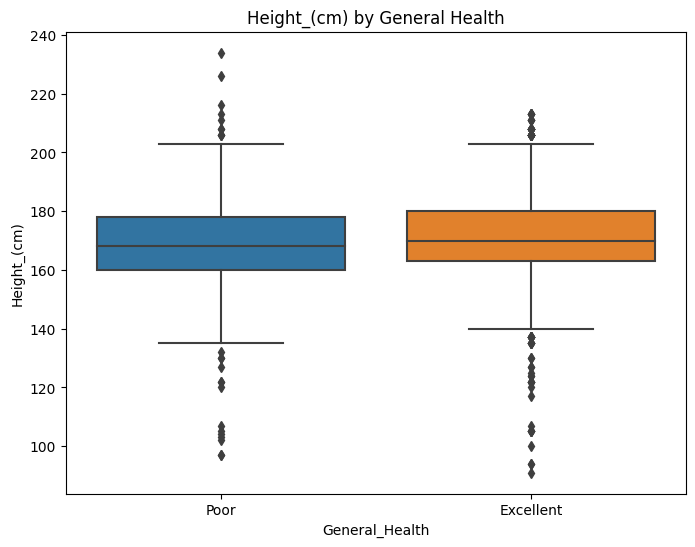

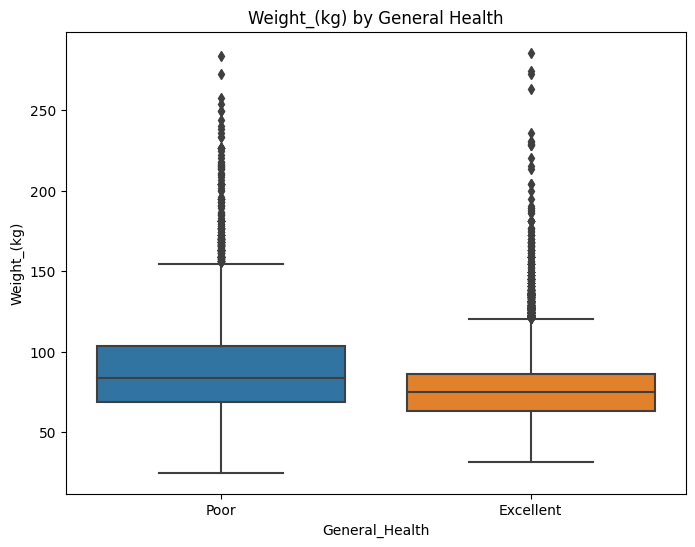

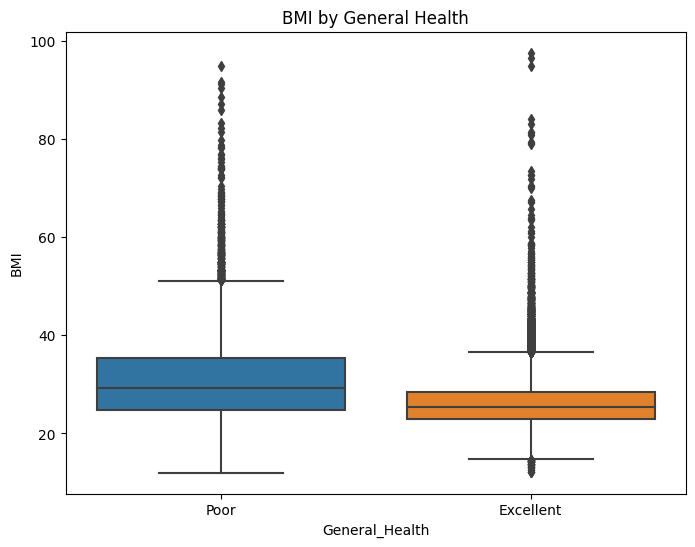

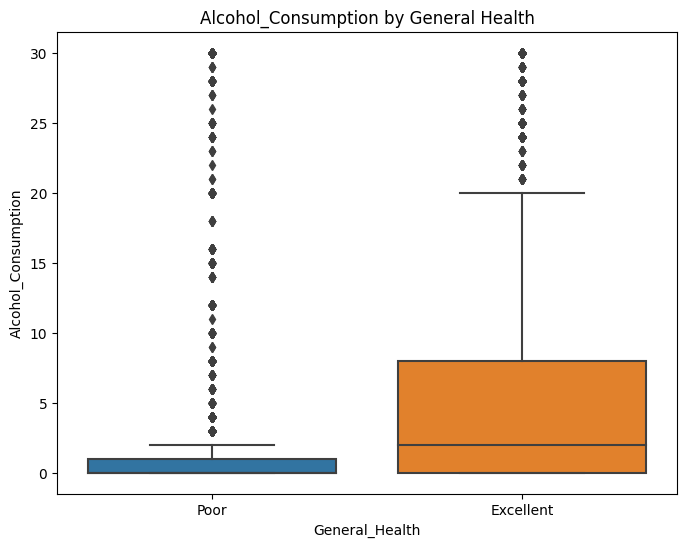

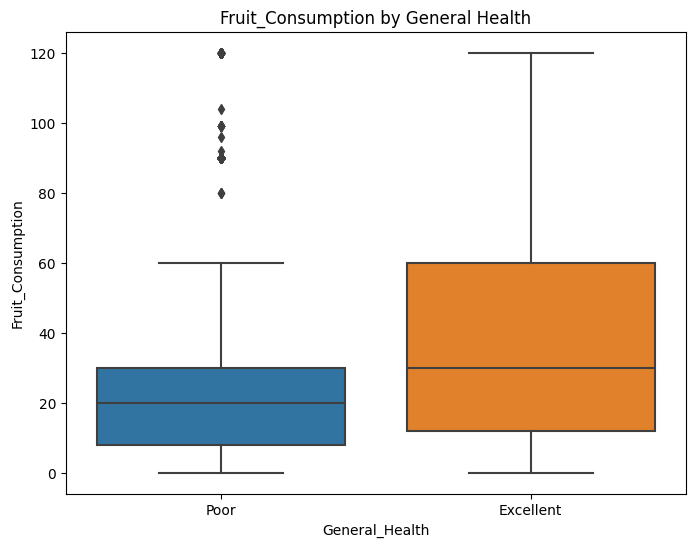

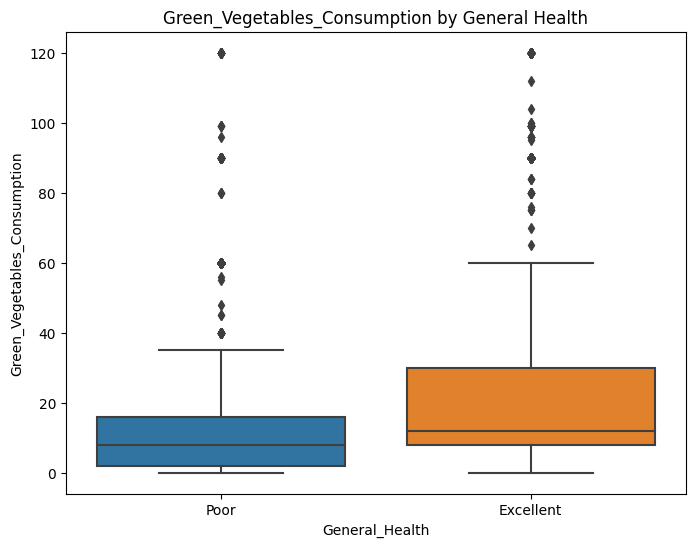

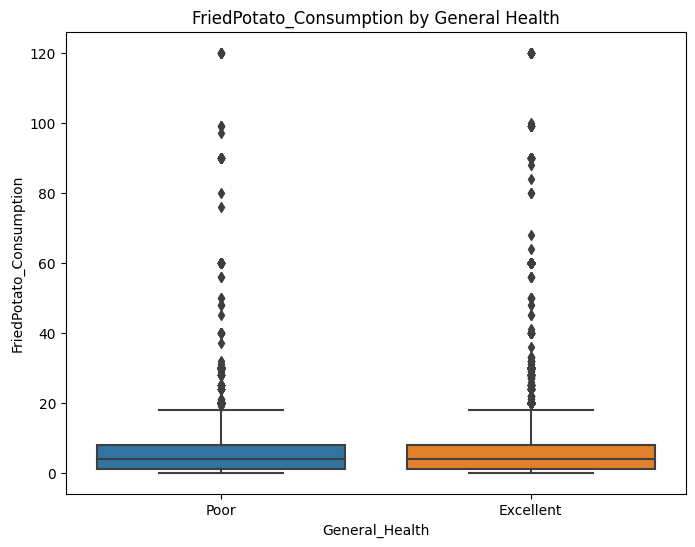

In [11]:
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='General_Health', y=col, data=df)
    plt.title(f'{col} by General Health')
    plt.show()

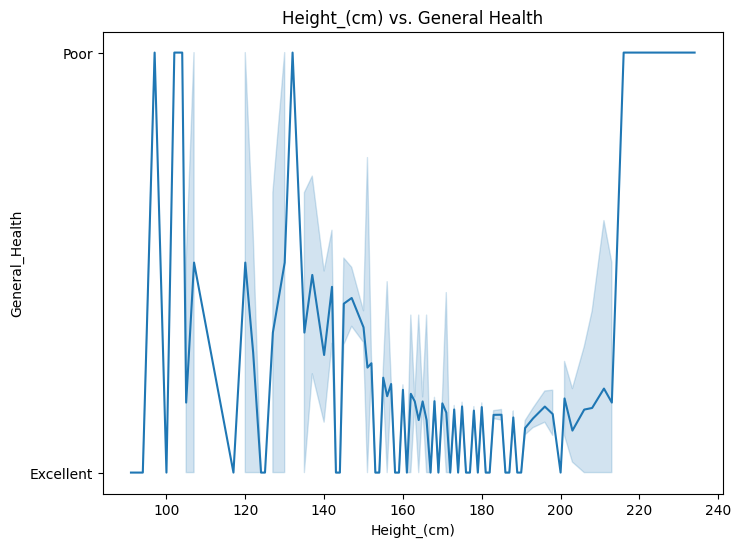

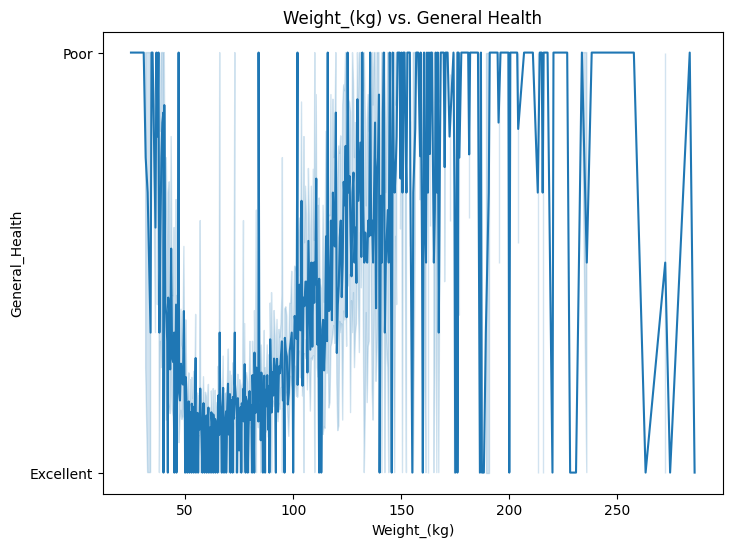

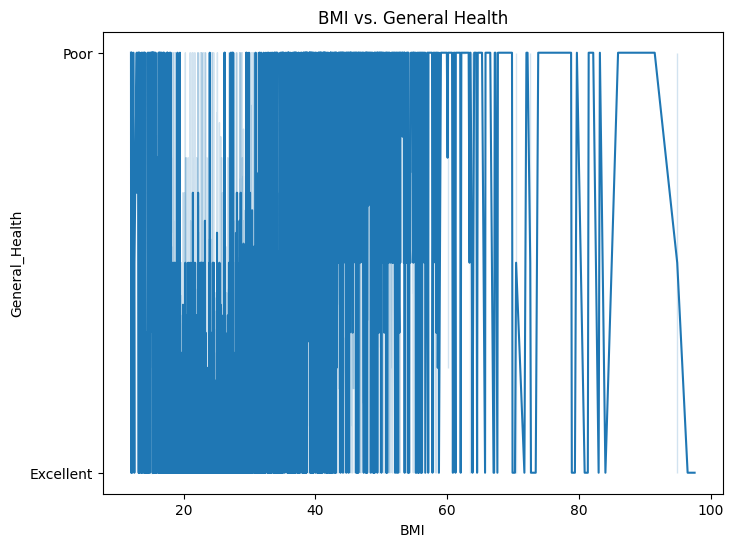

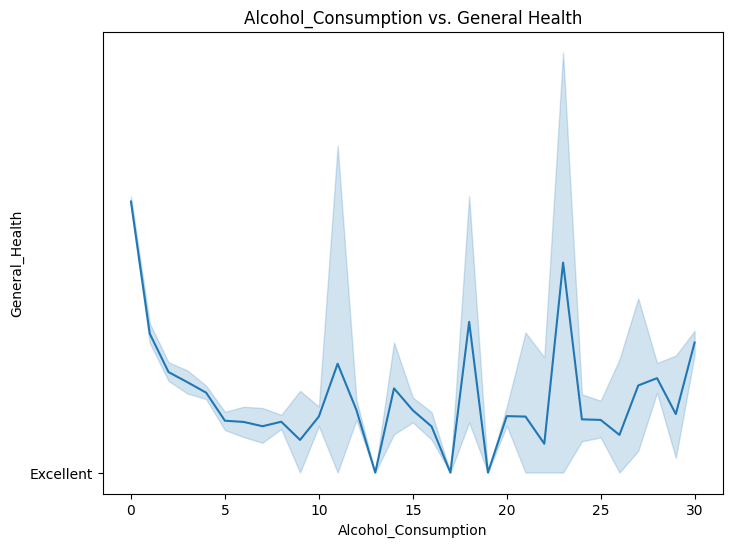

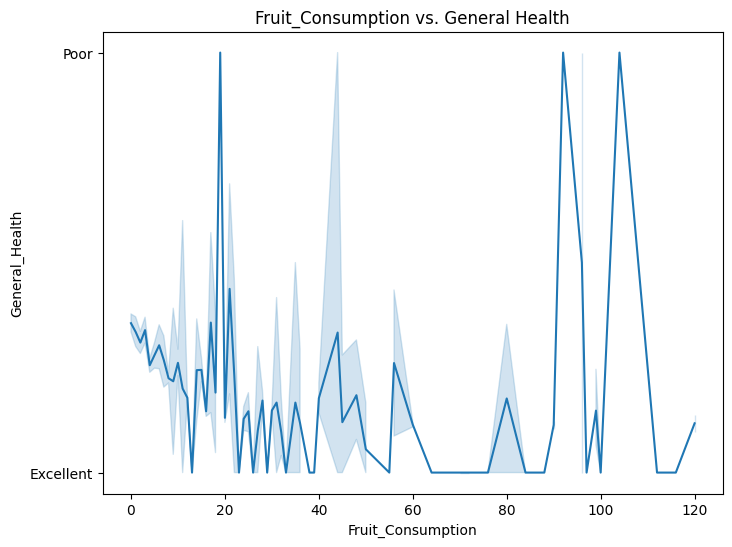

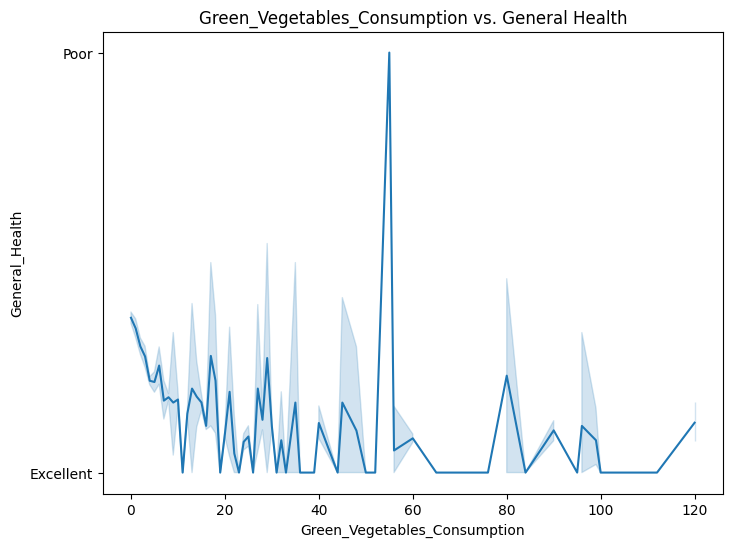

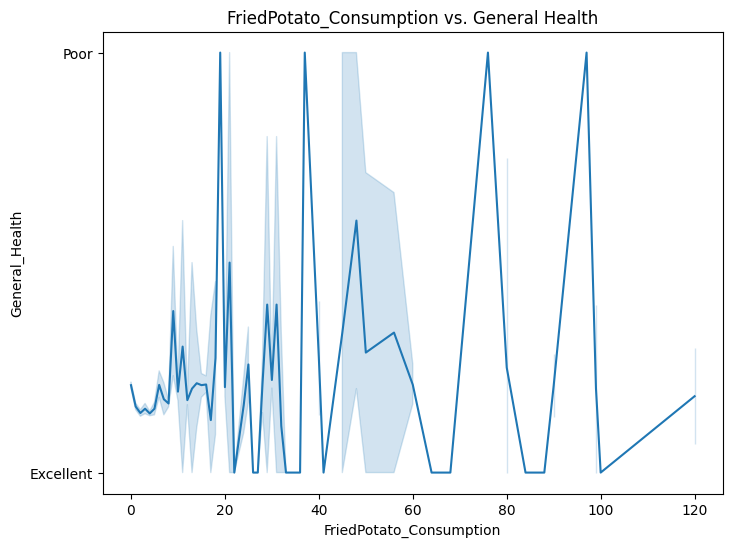

In [12]:
# what range of values of a continuous feature falls under which class of general_health
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=col, y='General_Health', data=df)
    plt.title(f'{col} vs. General Health')
    plt.show()

#Discrete Features

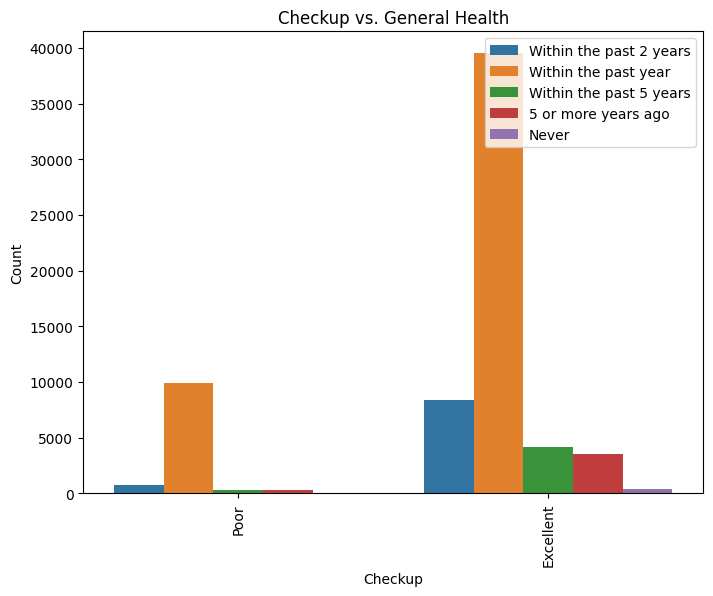

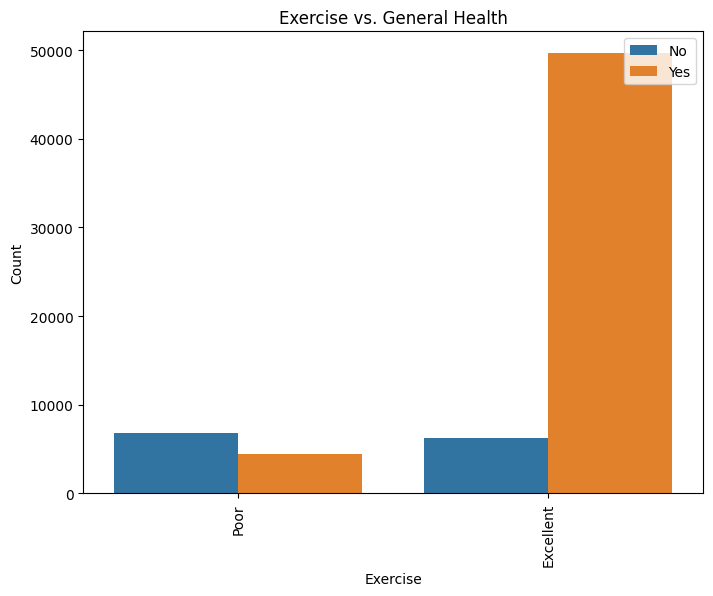

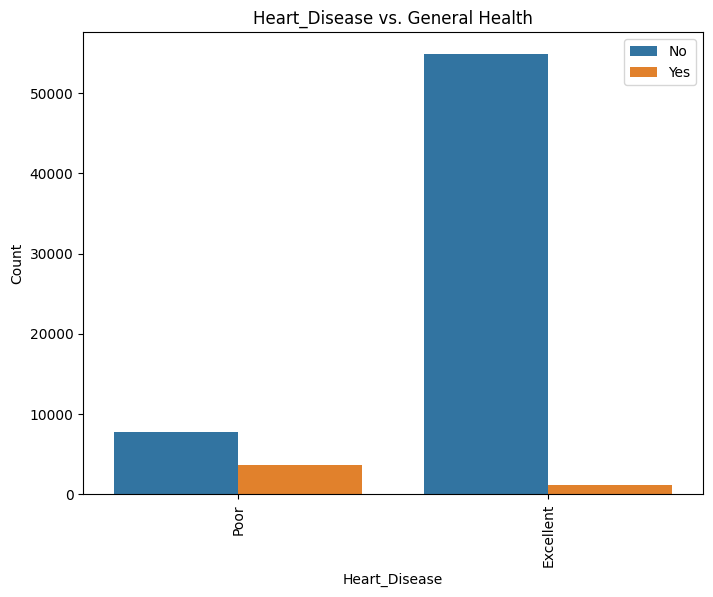

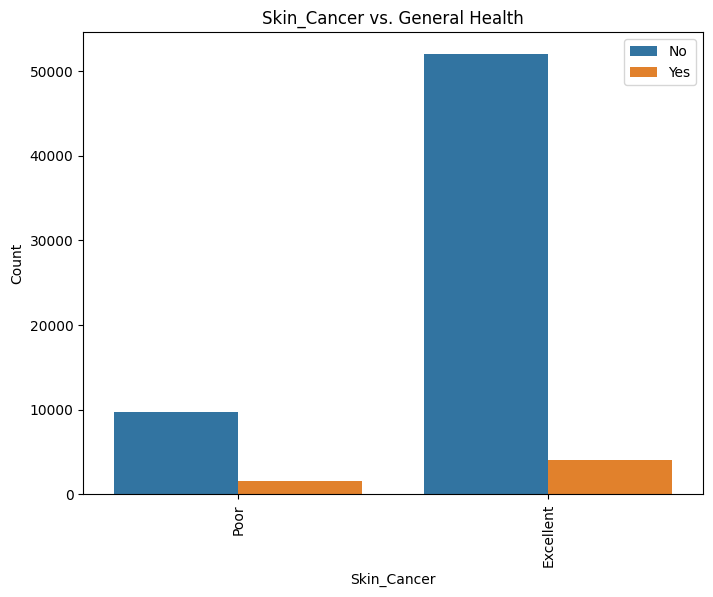

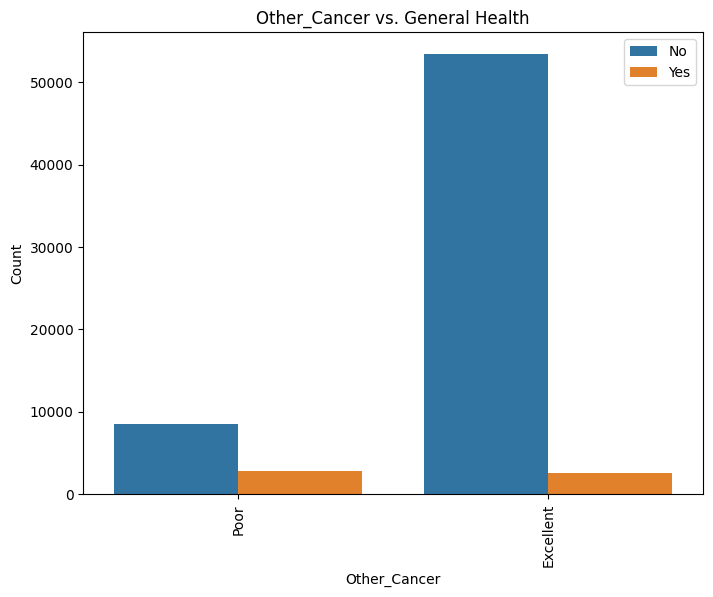

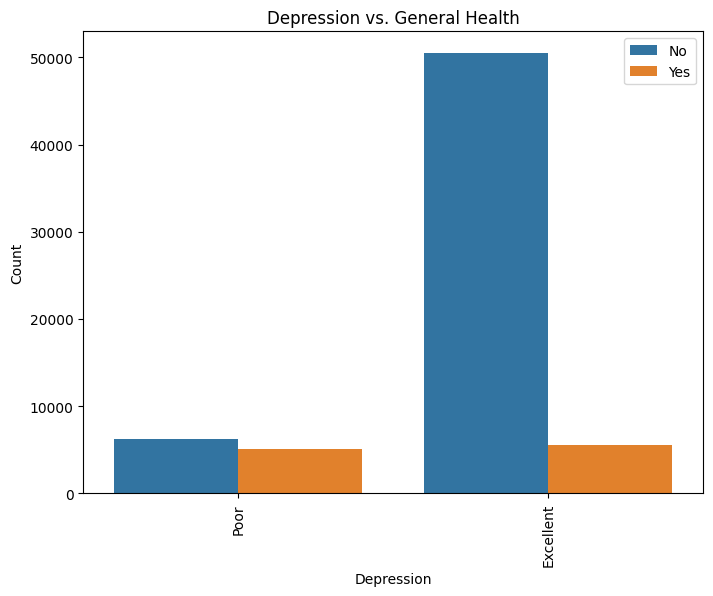

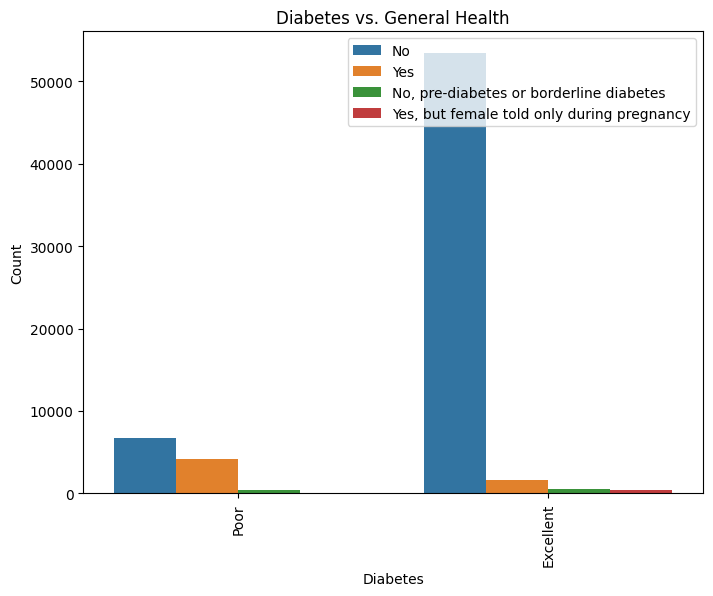

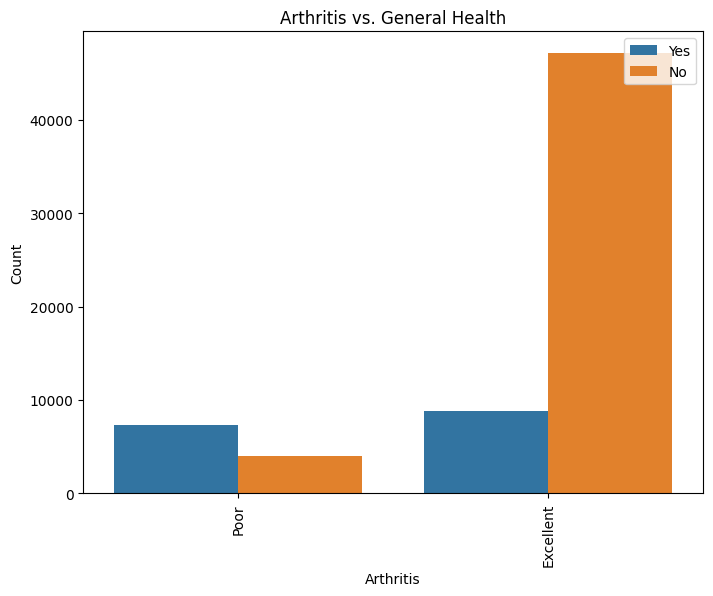

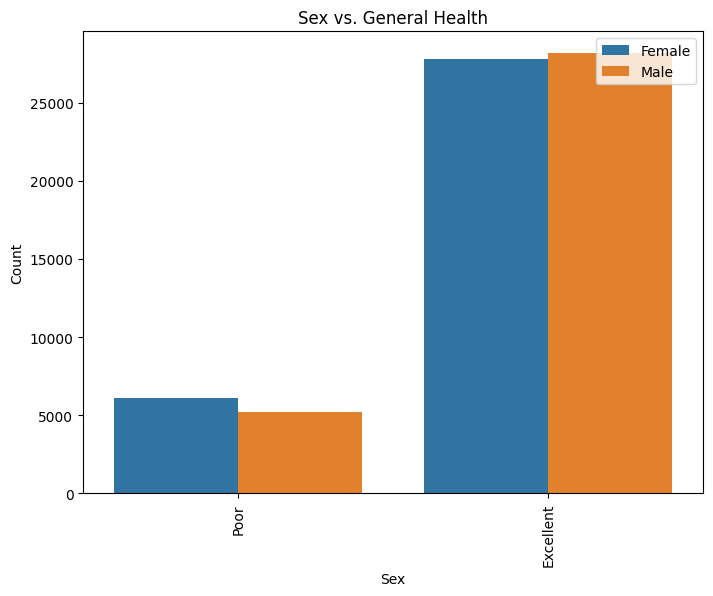

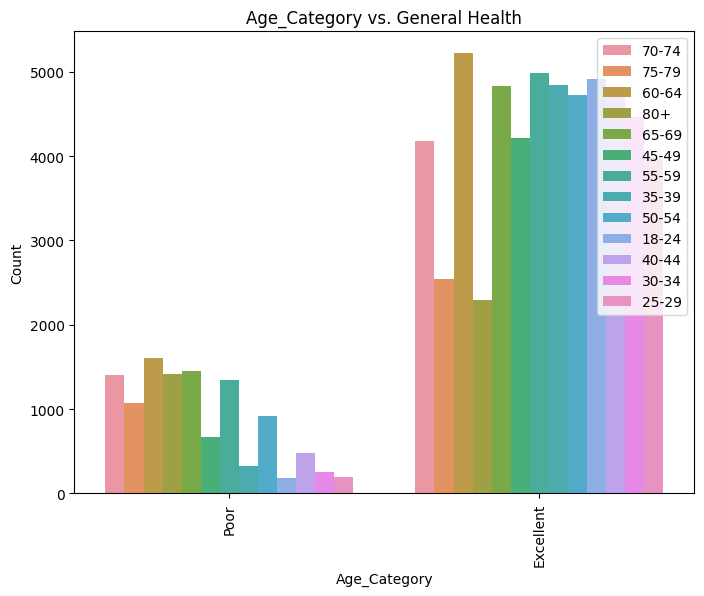

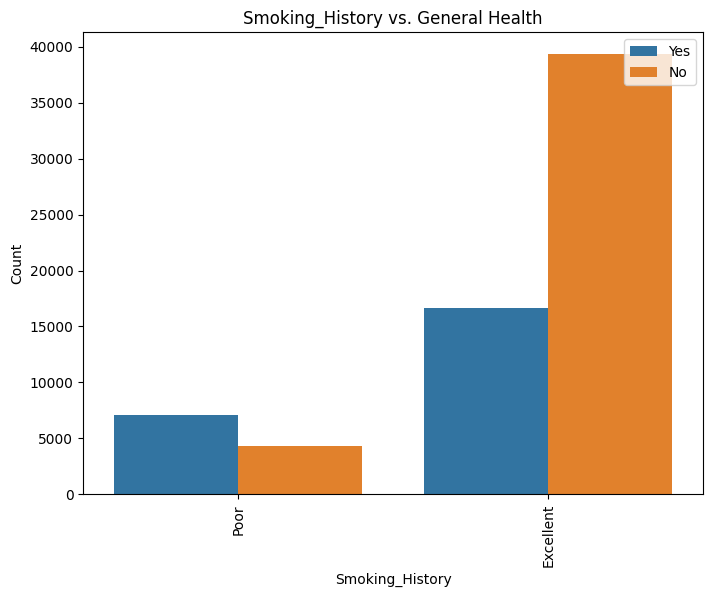

In [13]:
for col in discrete_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x="General_Health",hue = col ,data=df)
    plt.title(f'{col} vs. General Health')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Adjust the rotation here
    ax.legend(loc='upper right')
    plt.show()

#HANDLING OUTLIERS

In [14]:
#Function to handle outliers using IQR
def handle_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = data[col].median()
    return data

# Handling outliers for each continuous variable
for col in continuous_cols:
    if col == "Alcohol_Consumption" :
      continue
    df = handle_outliers(df, col)


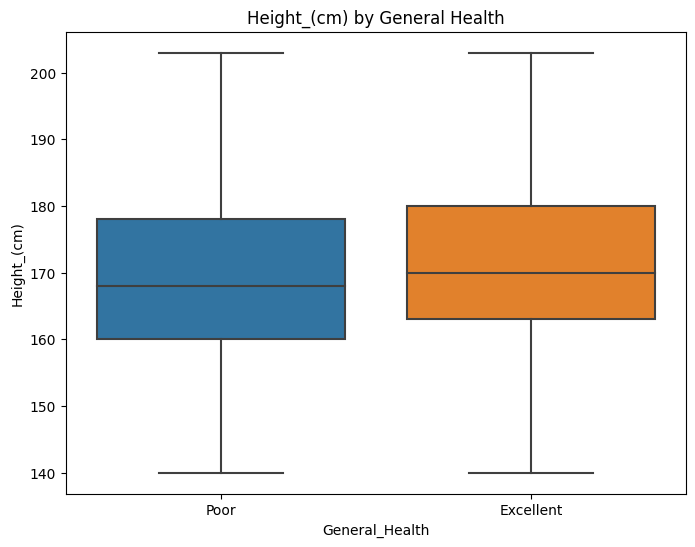

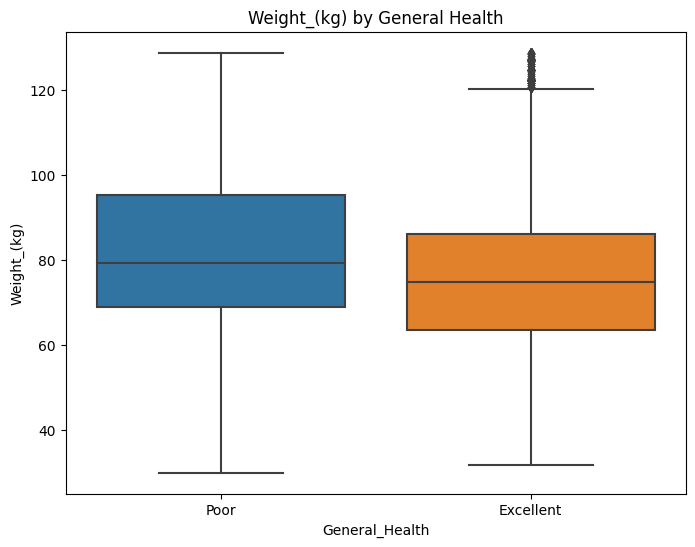

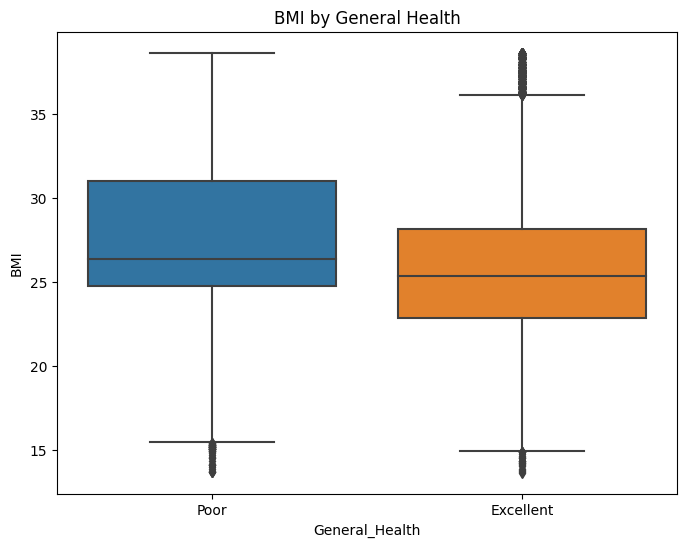

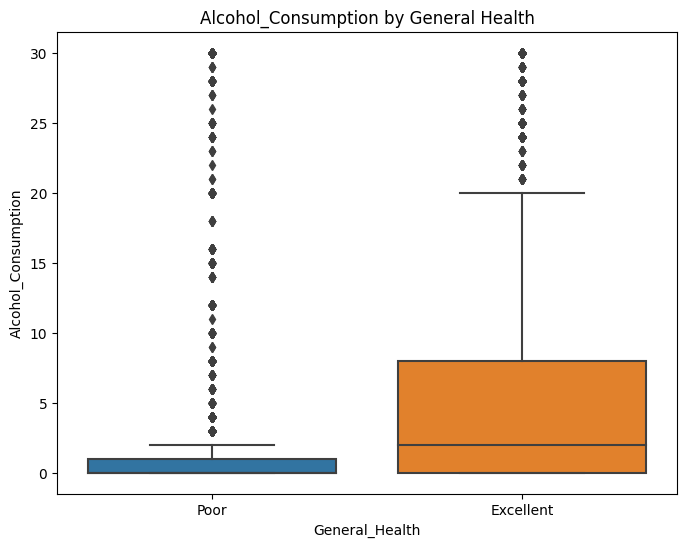

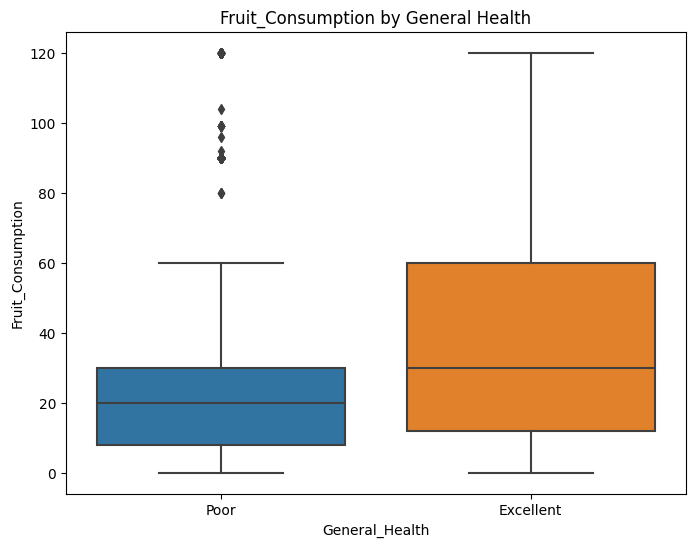

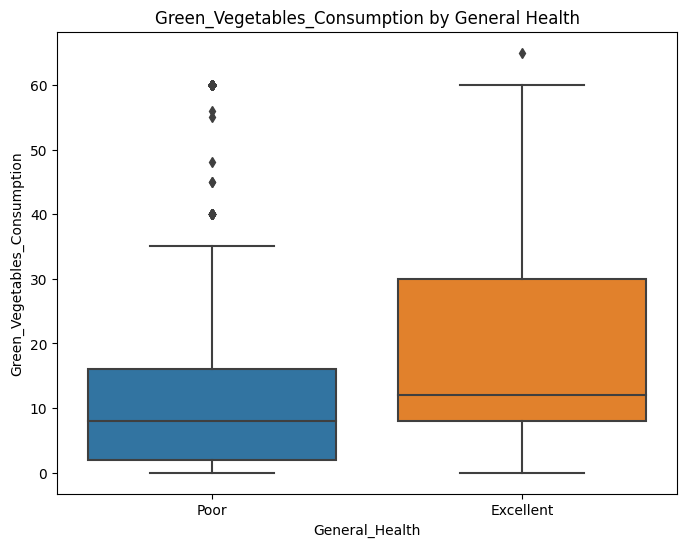

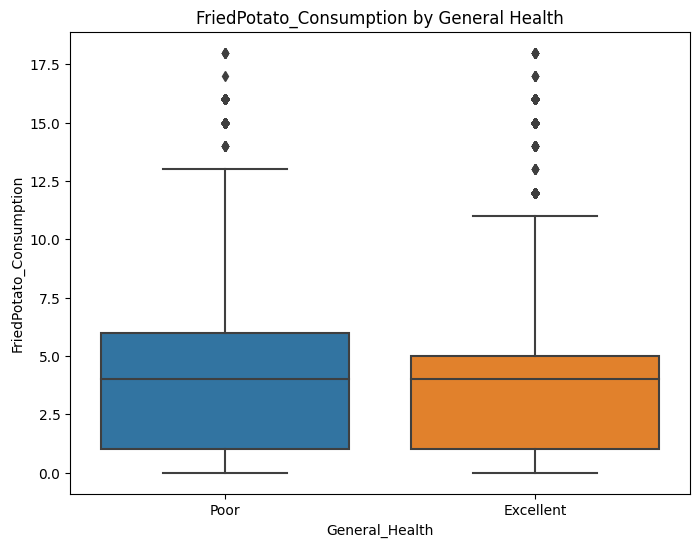

In [16]:
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='General_Health', y=col, data=df)
    plt.title(f'{col} by General Health')
    plt.show()

#ENCODING

In [17]:
from sklearn.preprocessing import LabelEncoder

# Applying label encoding to binary variables
label_encoder = LabelEncoder()
df['General_Health'] = label_encoder.fit_transform(df['General_Health'])

# Getting the mapping for 'General_Health'
general_health_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Printing the label encoding mapping for 'General_Health'
print(general_health_mapping)

{'Excellent': 0, 'Poor': 1}


In [18]:
# List of discrete variables
vars = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History','Age_Category', 'Diabetes', 'Checkup']

# Initialize an empty dictionary for mappings
label_mappings = {}

# Applying label encoding and storing mappings for all variables
label_encoder = LabelEncoder()
for var in vars:
    df[var] = label_encoder.fit_transform(df[var])
    label_mappings[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Printing the label encoding mappings for all variables
print(label_mappings)

{'Exercise': {'No': 0, 'Yes': 1}, 'Heart_Disease': {'No': 0, 'Yes': 1}, 'Skin_Cancer': {'No': 0, 'Yes': 1}, 'Other_Cancer': {'No': 0, 'Yes': 1}, 'Depression': {'No': 0, 'Yes': 1}, 'Arthritis': {'No': 0, 'Yes': 1}, 'Sex': {'Female': 0, 'Male': 1}, 'Smoking_History': {'No': 0, 'Yes': 1}, 'Age_Category': {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}, 'Diabetes': {'No': 0, 'No, pre-diabetes or borderline diabetes': 1, 'Yes': 2, 'Yes, but female told only during pregnancy': 3}, 'Checkup': {'5 or more years ago': 0, 'Never': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, 'Within the past year': 4}}


In [19]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
2,0,2,1,0,0,0,0,0,0,0,10,152,52.16,22.46,0,0,30,4,0
3,0,4,1,0,0,0,0,0,1,1,10,191,112.49,31.00,0,0,30,10,15
4,0,2,1,0,0,0,0,0,0,0,8,168,60.78,21.63,0,0,60,30,2


#Correlation Matrix

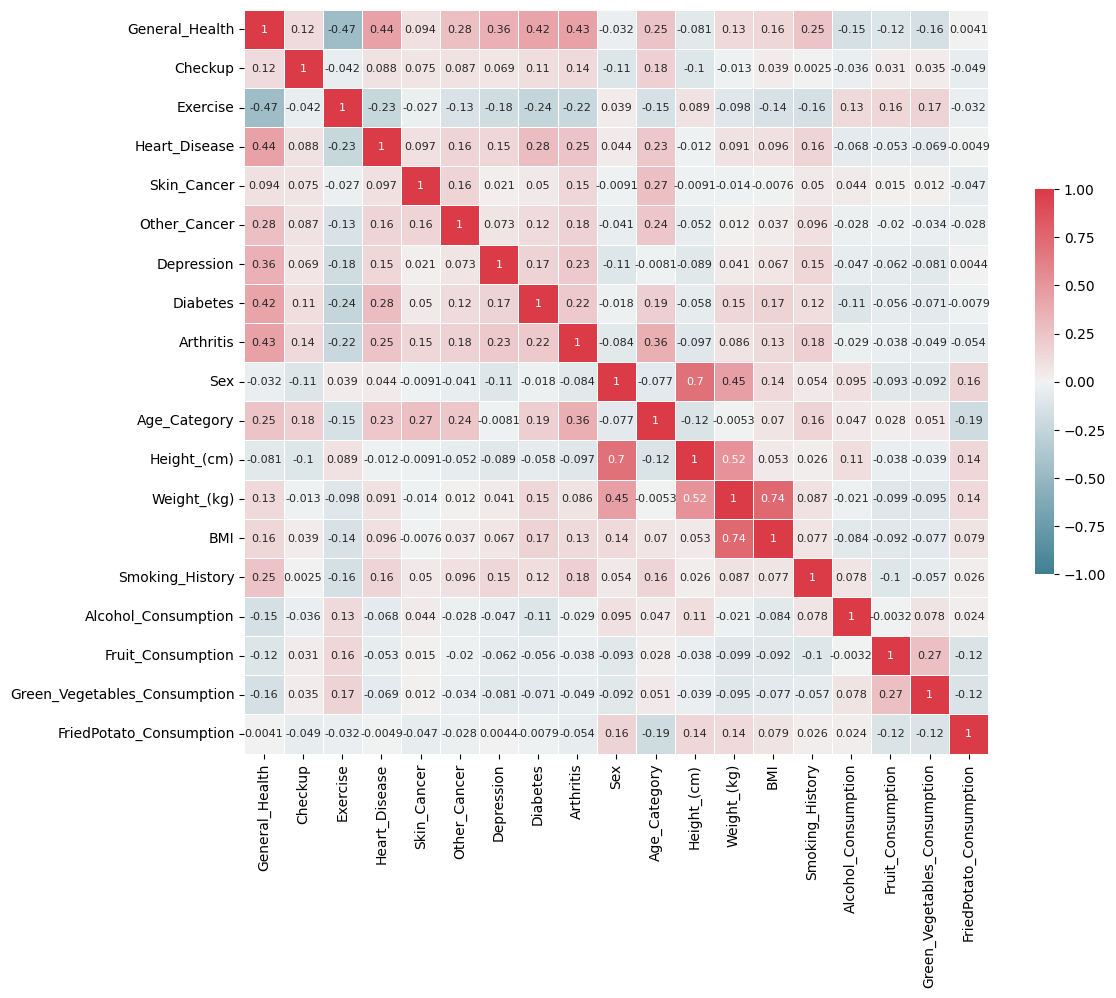

In [22]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8},cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


<Axes: >

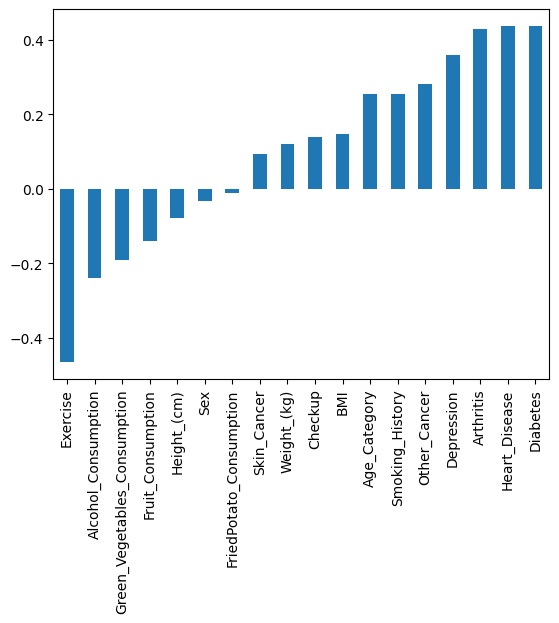

In [23]:
df.corr(method='spearman')['General_Health'].sort_values().drop(['General_Health']).plot(kind='bar')

In [24]:
df.to_csv('cleaned_dataset2.csv', index=False)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0,1,0,10,150,32.66,14.54,1,0,30,16,12
1,1,4,1,1,0,0,0,2,0,1,11,180,93.44,28.73,0,0,30,30,8
2,0,2,1,0,0,0,0,0,0,0,10,152,52.16,22.46,0,0,30,4,0
3,0,4,1,0,0,0,0,0,1,1,10,191,112.49,31.00,0,0,30,10,15
4,0,2,1,0,0,0,0,0,0,0,8,168,60.78,21.63,0,0,60,30,2
